In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmocean
import gsw

import scipy.stats as ss

In [224]:
infile = "../Calculations/SPIROPA_compileddata.csv"
df = pd.read_csv(infile)
df.columns

infile = "../Data/tn368_bottledata_Jan2020_v2.csv"
ctd = pd.read_csv(infile)
ctd.columns
sctd = ctd[(ctd[' Day']<9)]


In [225]:
# group by cruise
rb = df[df.month == 5]
tn = df[df.month == 7]
tn_nostream = df[(df.month == 7) & (df.day > 8)]

# distinguish sfc rates
rb_sfc = rb[rb.truedepth_m<10]
tn_sfc = tn[tn.truedepth_m<10]

# distinguish streamer
stream = tn[tn.day < 9]

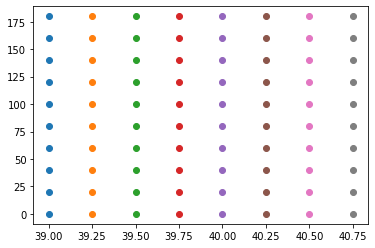

In [320]:
# make a grid
x = np.arange(39, 41, 0.25)
y = np.arange(0, 200, 20)

xx, yy = np.meshgrid(x, y)

h = plt.plot(xx, yy, 'o')
plt.show()

In [321]:
# bin the data into the grid

binned = ss.binned_statistic_2d(sctd.Lat, sctd.Depth_m, sctd.Sal1, statistic='mean', bins=[x, y])

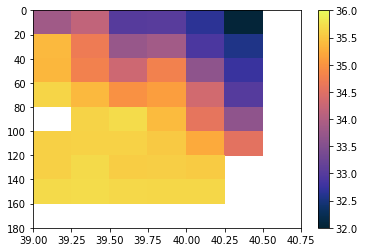

In [322]:
# plot the binned data

XX, YY = np.meshgrid(binned.x_edge, binned.y_edge)

palette = 'cmo.thermal'

plt.pcolormesh(XX, YY, binned.statistic.T, vmin = 32, vmax = 36, cmap = palette)
cb = plt.colorbar()

plt.gca().invert_yaxis()

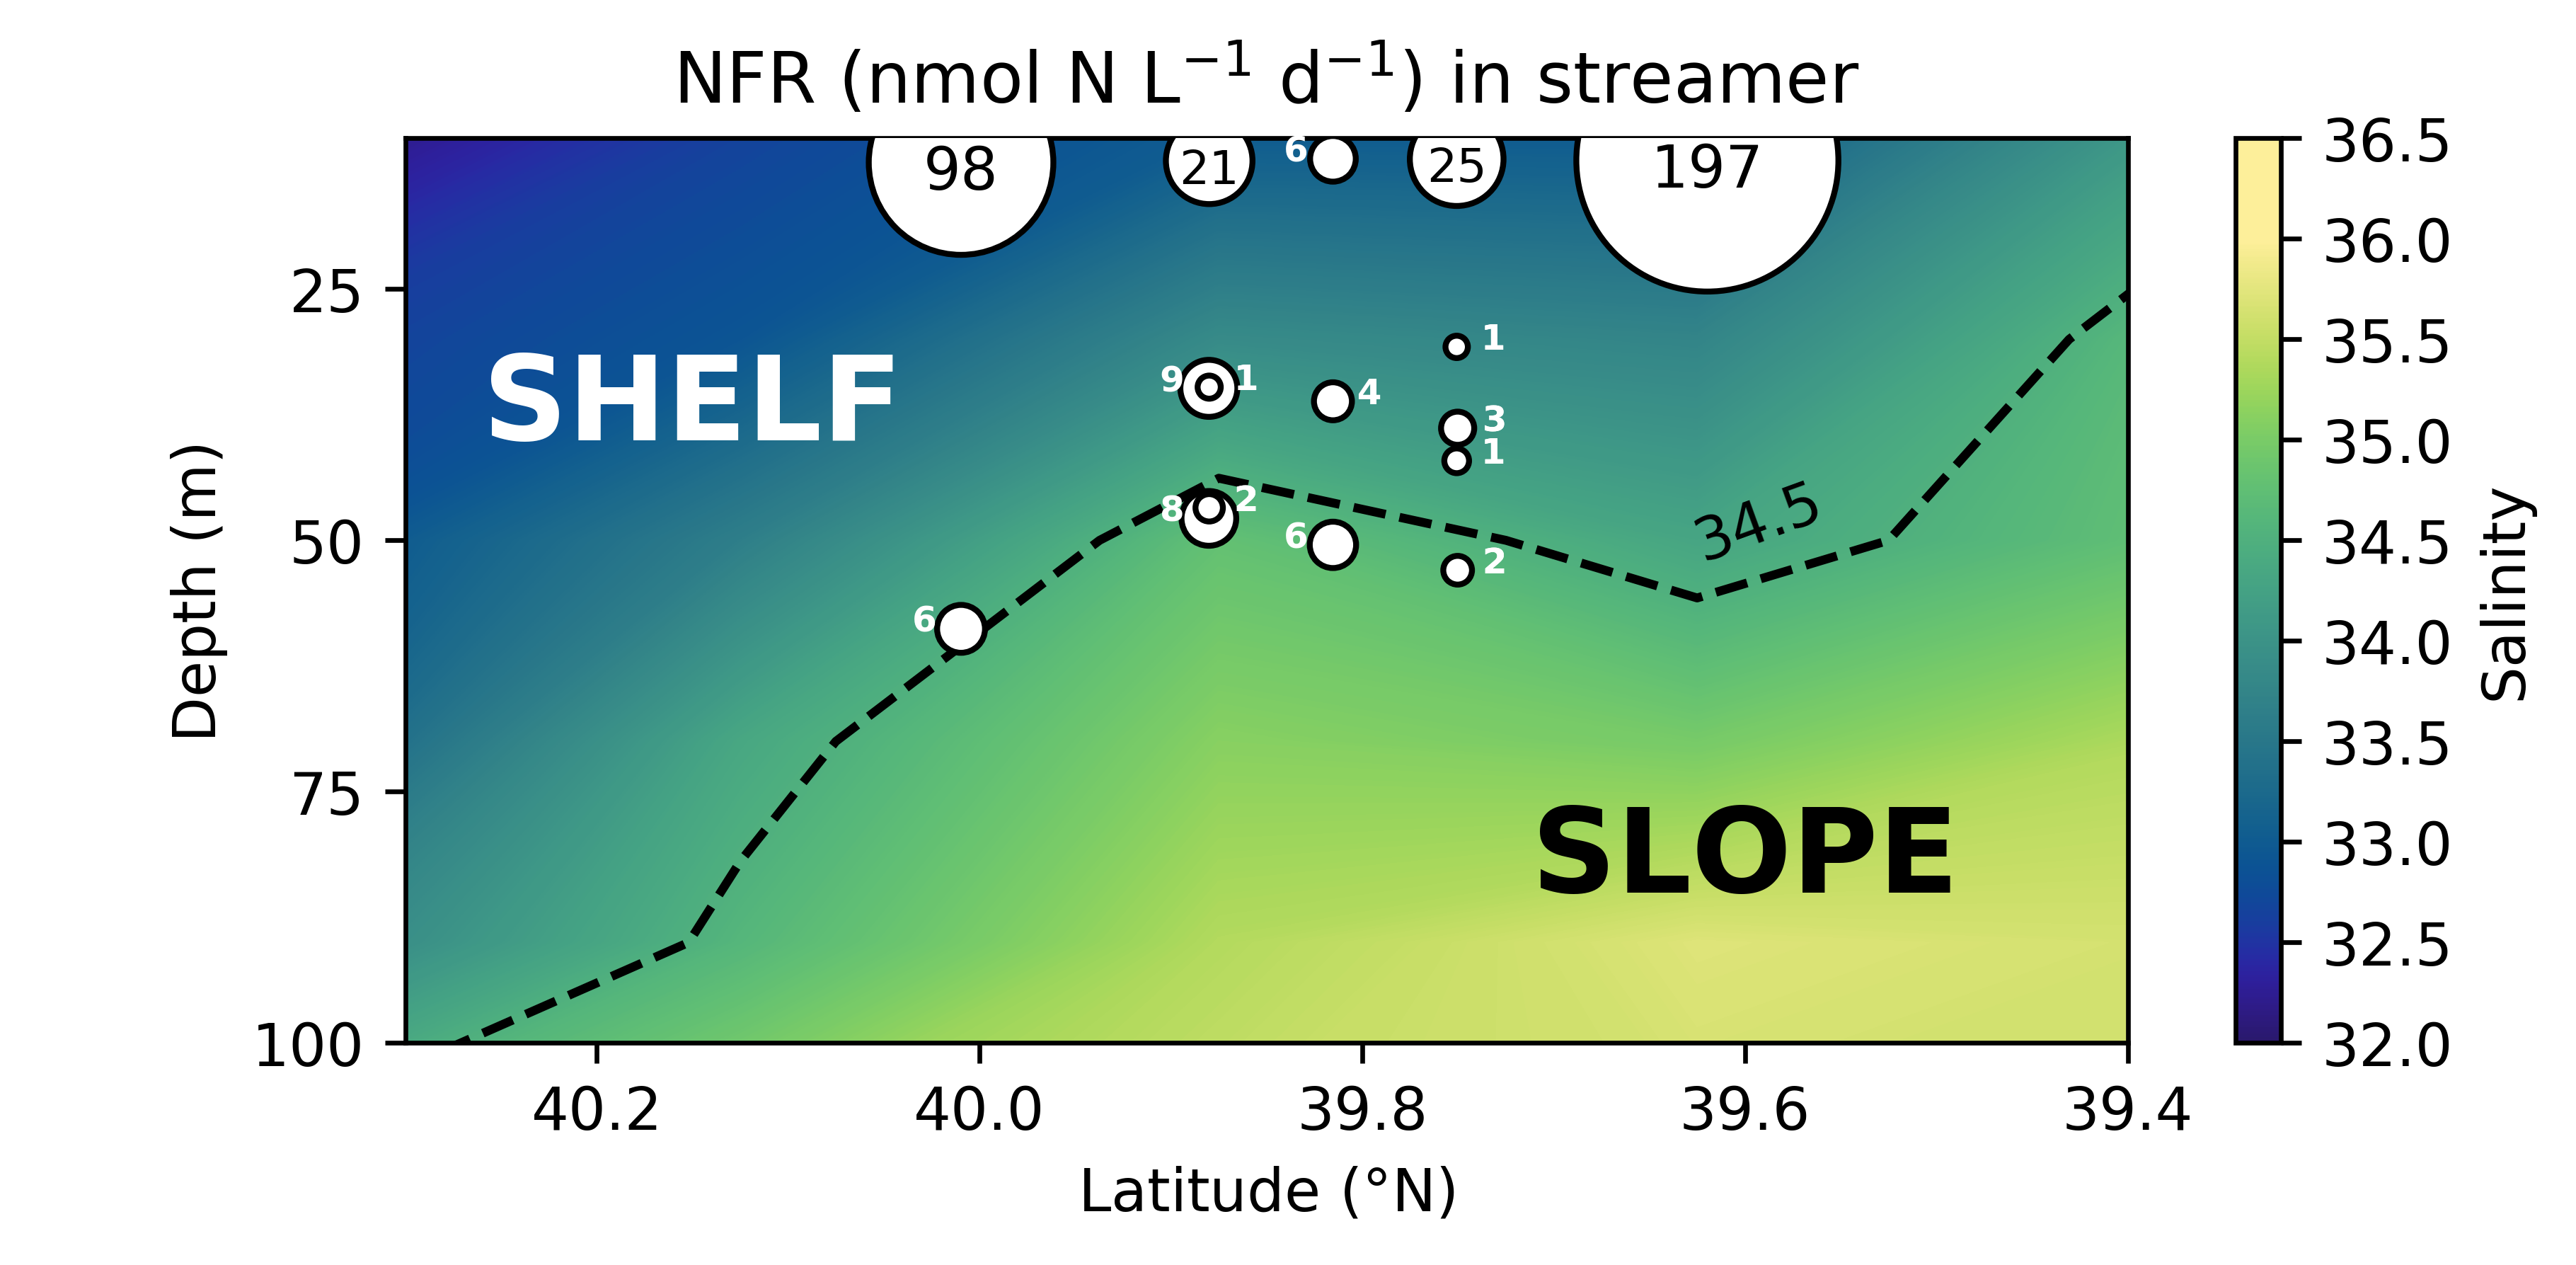

In [389]:
# to do a contour plot, you need to reference the center of the bins, not the edges
# get the bin centers
xc = (x[:-1] + x[1:]) / 2
yc = (y[:-1] + y[1:]) / 2

fig, ax = plt.subplots(1,1, dpi = 600, figsize = (6.5,3))

ax.scatter(stream.lat,stream.truedepth_m + 10, s = 10*stream.nfr, zorder = 10, color = 'w', edgecolors = 'k')
plt.contourf(xc, yc, binned.statistic.T, levels = np.arange(32, 36.51, 0.01), vmax = 36, cmap = 'cmo.haline', zorder = 0)

cb = plt.colorbar()
cb.set_ticks(np.arange(31,37,0.5))
cb.set_label('Salinity')

ax.set_yticks(np.arange(0,151,25))
ax.set_ylim(10,100)

ax.set_xticks(np.arange(39.4,40.6,0.2))
ax.set_xlim(39.4,40.3)

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in stream.nfr:
    if stream.lat[stream.nfr == i].item() > 39.4:
        if i > 50:
            ax.text(stream.lat[stream.nfr == i],stream.truedepth_m[stream.nfr == i]+11,('%i' % (round(i,1))),fontsize = 10,verticalalignment='center', horizontalalignment='center', zorder = 11)
        if (i < 50) & (i > 15):
            ax.text(stream.lat[stream.nfr == i],stream.truedepth_m[stream.nfr == i]+11,('%i' % (round(i,1))),fontsize = 8,verticalalignment='center', horizontalalignment='center', zorder = 11)
        if (i < 4)& (i > 0):
            ax.text(stream.lat[stream.nfr == i],stream.truedepth_m[stream.nfr == i]+11,('  %i' % (round(i,1))),fontsize = 6, fontweight = 'bold', verticalalignment='bottom', horizontalalignment='left', zorder = 11, color = 'w')
        if (i < 10)& (i > 5):
            ax.text(stream.lat[stream.nfr == i],stream.truedepth_m[stream.nfr == i]+11,('%i  ' % (round(i,1))),fontsize = 6, fontweight = 'bold', verticalalignment='bottom', horizontalalignment='right', zorder = 11, color = 'w')
        if (i < 5) & (i > 0) & (stream.truedepth_m[stream.nfr == i].item() > 20):
            ax.text(stream.lat[stream.nfr == i],stream.truedepth_m[stream.nfr == i]+11,('  %i' % (round(i,1))),fontsize = 6, fontweight = 'bold', verticalalignment='bottom', horizontalalignment='left', zorder = 11, color = 'w')

cs = plt.contour(xc, yc, binned.statistic.T, levels = [34.5], zorder = 2, colors = 'black', linestyles = '--')
ax.text(39.63,52,'34.5', rotation = 20, color = 'black')

ax.text(40.15,40,'SHELF', fontsize = 20,  fontweight = 'bold', color = 'w', horizontalalignment='center')
ax.text(39.6,85,'SLOPE', fontsize = 20,  fontweight = 'bold', color = 'black', horizontalalignment='center')

ax.set_ylabel('Depth (m)')
ax.set_xlabel('Latitude ($\degree$N)')

ax.set_title('NFR (nmol N L$^{-1}$ d$^{-1}$) in streamer')

plt.subplots_adjust(left = 0.17, right=0.95, bottom=0.17)

fig.savefig('../Figures/NFRinstreamer_section.png')